In [1]:
import sys
sys.path

['/Users/Antoine/Desktop/Cours/Kaggle Antoine/Concours/Housing Price',
 '/Users/Antoine/opt/anaconda3/lib/python39.zip',
 '/Users/Antoine/opt/anaconda3/lib/python3.9',
 '/Users/Antoine/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/Antoine/.ipython']

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Loading and splitting data

In [4]:
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)
print(home_data.shape)
home_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test_file = 'test.csv'
test_data = pd.read_csv(test_file)
print(test_data.shape)
test_data.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Target
y = home_data.SalePrice
# Create X
X = home_data.drop(labels='SalePrice',axis=1) # on prend toutes les features sauf la target

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

# Data exploration

2010.0


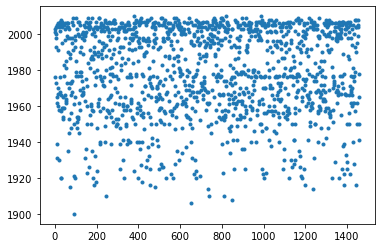

In [8]:
plt.plot(home_data.index, home_data['GarageYrBlt'],'.')
print(home_data['GarageYrBlt'].max())

2207.0


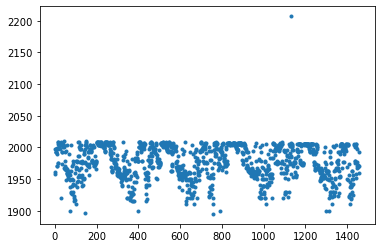

In [9]:
plt.plot(test_data.index, test_data['GarageYrBlt'],'.')
print(test_data['GarageYrBlt'].max())

In [10]:
# Outlier detected to remove
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].replace(test_data['GarageYrBlt'].max(), test_data['GarageYrBlt'].mean())

# Numerical values

In [11]:
# Isolate numerical columns
X_train_num = X_train.select_dtypes(exclude=['object'])
X_val_num = X_val.select_dtypes(exclude=['object'])
test_num = test_data.select_dtypes(exclude=['object'])

# Get names of columns with missing value
cols_with_missing = [col for col in X_train_num
                     if X[col].isnull().any()]

# Get names of columns to impute missing values with 0
cols_impute_0 = ['LotFrontage','MasVnrArea']

# Get names of columns to impute missing values with constant
cols_impute_cst = ['GarageYrBlt']

## Missing values

In [12]:
# Make new columns indicating what will be imputed
cols_with_missing = [col for col in X_train_num if X.loc[:, col].isna().any()]

for col in cols_with_missing:
    X_train_num.loc[:, col + '_was_missing'] = X_train_num.loc[:, col].isnull()
    X_val_num.loc[:, col + '_was_missing'] = X_val_num.loc[:, col].isnull()
    test_num.loc[:, col + '_was_missing'] = test_num.loc[:, col].isnull()

/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [13]:
# Imputing values
min1 = X_train_num.loc[:, 'LotFrontage'].dropna().min()
min2 = X_train_num.loc[:, 'GarageYrBlt'].dropna().min()

X_train_num.loc[:, 'LotFrontage'] = X_train_num.loc[:, 'LotFrontage'].fillna(value = min1)
X_train_num.loc[:, 'GarageYrBlt'] = X_train_num.loc[:, 'GarageYrBlt'].fillna(value = min2)
X_train_num.loc[:, 'MasVnrArea'] = X_train_num.loc[:, 'MasVnrArea'].fillna(value=0)

X_val_num.loc[:, 'LotFrontage'] = X_val_num.loc[:, 'LotFrontage'].fillna(value = min1)
X_val_num.loc[:, 'GarageYrBlt'] = X_val_num.loc[:, 'GarageYrBlt'].fillna(value = min2)
X_val_num.loc[:, 'MasVnrArea'] = X_val_num.loc[:, 'MasVnrArea'].fillna(value=0)

test_num.loc[:, 'LotFrontage'] = test_num.loc[:, 'LotFrontage'].fillna(value = min1)
test_num.loc[:, 'GarageYrBlt'] = test_num.loc[:, 'GarageYrBlt'].fillna(value = min2)
test_num.loc[:, 'MasVnrArea'] = test_num.loc[:, 'MasVnrArea'].fillna(value=0)

for col in test_num:
    test_num.loc[:, col] = test_num.loc[:, col].fillna(value=0)

/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Feature engineering

In [14]:
# Feature correlation
train = pd.concat([X_train,y_train], axis=1)

corr = train.corr().sort_values(by='SalePrice',ascending=False).round(2)
top_features = corr['SalePrice'].drop('SalePrice').head(n=10)
top_features

OverallQual     0.78
GrLivArea       0.69
GarageCars      0.64
GarageArea      0.63
TotalBsmtSF     0.61
1stFlrSF        0.60
FullBath        0.57
TotRmsAbvGrd    0.54
YearBuilt       0.52
YearRemodAdd    0.50
Name: SalePrice, dtype: float64

In [15]:
# New features : polynomial correlations
for k in top_features.index:
    X_train_num.loc[:, k+'2'] = X_train_num.loc[:, k]**2
    X_val_num.loc[:, k+'2'] = X_val_num.loc[:, k]**2
    test_num.loc[:, k+'2'] = test_num.loc[:, k]**2
    
    X_train_num.loc[:, k+'3'] = X_train_num.loc[:, k]**3
    X_val_num.loc[:, k+'3'] = X_val_num.loc[:, k]**3
    test_num.loc[:, k+'3'] = test_num.loc[:, k]**3
    
    X_train_num.loc[:, k+'4'] = X_train_num.loc[:, k]**4
    X_val_num.loc[:, k+'4'] = X_val_num.loc[:, k]**4
    test_num.loc[:, k+'4'] = test_num.loc[:, k]**4

## Scaling

In [16]:
scaler = StandardScaler()
scaler = scaler.fit(X_train_num)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num))
X_val_num_scaled = pd.DataFrame(scaler.transform(X_val_num))
test_num_scaled = pd.DataFrame(scaler.transform(test_num))

X_train_num_scaled.index = X_train.index
X_val_num_scaled.index = X_val.index
test_num_scaled.index = test_data.index

X_train_num_scaled.columns = X_train_num.columns
X_val_num_scaled.columns = X_val_num.columns
test_num_scaled.columns = test_num.columns

# Categorical values

In [17]:
cols_with_cat = [col for col in X_train.columns if X_train[col].dtype=='object']

X_train_cat = X_train[cols_with_cat]
X_val_cat = X_val[cols_with_cat]
test_cat = test_data[cols_with_cat]

## Missing values

In [18]:
M = [X_train_cat,X_val_cat,test_cat]

for k in M:
    for u in k:
        test_cat.loc[:, u] = test_cat.loc[:, u].fillna(value='aucun')
        X_val_cat.loc[:, u] = X_val_cat.loc[:, u].fillna(value='aucun')
        X_train_cat.loc[:, u] = X_train_cat.loc[:, u].fillna(value='aucun')

/Users/Antoine/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


## One-hot encoding

In [19]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in cols_with_cat if X_train_cat[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(cols_with_cat)-set(low_cardinality_cols))

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_cat[low_cardinality_cols]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(X_val_cat[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_cat[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_val.index = X_val.index
OH_cols_test.index = test_data.index

# Regrouping categorical and numerical data

In [20]:
# Add one-hot encoded columns to numerical features
final_X_train = pd.concat([X_train_num_scaled, OH_cols_train], axis=1)
final_X_val = pd.concat([X_val_num_scaled, OH_cols_val], axis=1)
final_test = pd.concat([test_num_scaled, OH_cols_test], axis=1)

# Model

## Random forest

In [21]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(final_X_train, y_train)

melb_preds = forest_model.predict(final_X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(melb_preds, y_val)))

Mean Absolute Error: 16672.682027397263


## XGBoost Regressor

In [22]:
final_X_train = final_X_train.drop([0, 1, 'LotFrontage_was_missing', 'MasVnrArea_was_missing'], axis=1)
final_X_val = final_X_val.drop([0, 1, 'LotFrontage_was_missing', 'MasVnrArea_was_missing'], axis=1)

In [23]:
my_model = xgb.XGBRegressor()
my_model.fit(final_X_train, y_train)

predictions = my_model.predict(final_X_val)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_val)))

Mean Absolute Error: 16629.61770119863


In [ ]:
preds_test_1 = my_model.predict(final_test)

# Save test predictions to file
output = pd.DataFrame({'Id': Id_test,
                       'SalePrice': preds_test_1})
output.to_csv('submission.csv', index=False)